In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [3]:
training_path = '/content/drive/MyDrive/dino-dragon/dino-dragon/train'
validation_path = '/content/drive/MyDrive/dino-dragon/dino-dragon/test'

In [4]:
image_enhancer = ImageDataGenerator(rescale=1./255)
validation_enhancer = ImageDataGenerator(rescale=1./255)

In [5]:
image_collector = image_enhancer.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_collector = validation_enhancer.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [6]:
neural_structure = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
neural_structure.compile(optimizer=SGD(learning_rate=0.002, momentum=0.8),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])


In [8]:
learning_process = neural_structure.fit(
    image_collector,
    epochs=10,
    validation_data=validation_collector)

Epoch 1/10
80/80 [==============================] - 339s 4s/step - loss: 0.6473 - accuracy: 0.6085 - val_loss: 0.5243 - val_accuracy: 0.8249
Epoch 2/10
80/80 [==============================] - 67s 839ms/step - loss: 0.5033 - accuracy: 0.7792 - val_loss: 0.4597 - val_accuracy: 0.8249
Epoch 3/10
80/80 [==============================] - 51s 635ms/step - loss: 0.4211 - accuracy: 0.8187 - val_loss: 0.4803 - val_accuracy: 0.7513
Epoch 4/10
80/80 [==============================] - 49s 610ms/step - loss: 0.3645 - accuracy: 0.8570 - val_loss: 0.4625 - val_accuracy: 0.7741
Epoch 5/10
80/80 [==============================] - 48s 601ms/step - loss: 0.3312 - accuracy: 0.8607 - val_loss: 0.3518 - val_accuracy: 0.8528
Epoch 6/10
80/80 [==============================] - 52s 648ms/step - loss: 0.3109 - accuracy: 0.8802 - val_loss: 0.3217 - val_accuracy: 0.8528
Epoch 7/10
80/80 [==============================] - 54s 680ms/step - loss: 0.2835 - accuracy: 0.8877 - val_loss: 0.3302 - val_accuracy: 0.8401
E

In [9]:
neural_structure.summary()

median_score = np.median(learning_process.history['accuracy'])
variability_loss = np.std(learning_process.history['loss'])
print(f"Средний уровень точности: {median_score:.2f}")
print(f"Вариативность потерь: {variability_loss:.2f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [10]:
enhanced_image_enhancer = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

enhanced_image_collector = enhanced_image_enhancer.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

advanced_learning_process = neural_structure.fit(
    enhanced_image_collector,
    epochs=10,
    validation_data=validation_collector)

Found 1594 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 64s 799ms/step - loss: 0.4728 - accuracy: 0.7760 - val_loss: 0.4273 - val_accuracy: 0.7792
Epoch 2/10
80/80 [==============================] - 56s 701ms/step - loss: 0.4294 - accuracy: 0.8024 - val_loss: 0.3033 - val_accuracy: 0.8680
Epoch 3/10
80/80 [==============================] - 57s 704ms/step - loss: 0.4024 - accuracy: 0.8168 - val_loss: 0.3849 - val_accuracy: 0.8274
Epoch 4/10
80/80 [==============================] - 58s 723ms/step - loss: 0.4127 - accuracy: 0.8143 - val_loss: 0.3068 - val_accuracy: 0.8579
Epoch 5/10
80/80 [==============================] - 58s 717ms/step - loss: 0.3890 - accuracy: 0.8218 - val_loss: 0.2507 - val_accuracy: 0.8934
Epoch 6/10
80/80 [==============================] - 58s 727ms/step - loss: 0.3826 - accuracy: 0.8388 - val_loss: 0.3532 - val_accuracy: 0.8325
Epoch 7/10
80/80 [==============================] - 58s 726ms/step - loss: 0.3827 - accuracy: 0.8294

In [11]:
loss_average = np.mean(advanced_learning_process.history['val_loss'])
accuracy_final = np.mean(advanced_learning_process.history['val_accuracy'][-5:])
print(f"Потери в среднем после усиления: {loss_average:.2f}")
print(f"Точность в конце обучения: {accuracy_final:.2f}")

Потери в среднем после усиления: 0.36
Точность в конце обучения: 0.83


Saving 85b6b20bb072cb69911a2bd7af2b1ef8.jpg to 85b6b20bb072cb69911a2bd7af2b1ef8.jpg
1/1 [==============================] - 0s 246ms/step


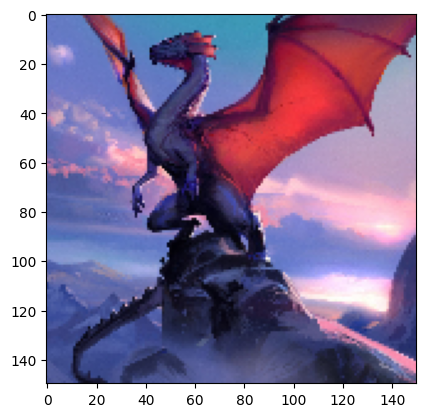

85b6b20bb072cb69911a2bd7af2b1ef8.jpg is predicted to be class Dragon


In [12]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

def classify_uploaded_images(neural_structure):
    uploaded_files = files.upload()

    for file_name in uploaded_files.keys():
        # Здесь код для обработки и классификации изображения
        path = f'/content/{file_name}'
        img = image.load_img(path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255
        prediction = neural_structure.predict(img_array)

        plt.imshow(img)
        plt.show()

        if prediction[0] > 0.5:
            print(f"{file_name} is predicted to be class Dragon")
        else:
            print(f"{file_name} is predicted to be class Dinosaur")
# Вызовите функцию, чтобы запустить процесс загрузки и классификации
classify_uploaded_images(neural_structure)

